Internship Project - 1


In [1]:
# Environment setting ..........
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the xlsx dataset
faredata = pd.read_excel('Flight_Fare.xlsx')

In [3]:
#Data Exploration
faredata.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
faredata.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [5]:
faredata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
faredata.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
faredata.groupby('Airline')['Price'].mean()

Airline
Air Asia                              5590.260188
Air India                             9611.210616
GoAir                                 5861.056701
IndiGo                                5673.682903
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
SpiceJet                              4338.284841
Trujet                                4140.000000
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Name: Price, dtype: float64

In [8]:
#checking null value for data cleaning process
faredata.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
# fill the null values with atleast 1 stop 
faredata['Total_Stops'].fillna('1 stop', inplace=True)

In [10]:
#data cleaning
faredata.dropna(inplace=True) # or df.fillna(method='ffill', inplace=True)



In [11]:
faredata.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [12]:
#converting data_of Journey to datetime format
faredata['Date_of_Journey']=pd.to_datetime(faredata['Date_of_Journey'], format='%d/%m/%Y')

In [13]:
# Feature Engineering
# Extract day of the week, month, and day from 'Date_of_Journey'
faredata['Journey_Day'] = faredata['Date_of_Journey'].dt.day
faredata['Journey_Month'] = faredata['Date_of_Journey'].dt.month
faredata['Journey_Weekday'] = faredata['Date_of_Journey'].dt.weekday

# Convert 'Duration' to a total number of minutes or hours for easier analysis
def parse_duration(duration):
    hours = 0
    minutes = 0
    duration = duration.split()
    if 'h' in duration[0]:
        hours = int(duration[0].replace('h', ''))
        if len(duration) > 1:
            minutes = int(duration[1].replace('m', ''))
    else:
        minutes = int(duration[0].replace('m', ''))
    return 60 * hours + minutes

faredata['Duration_minutes'] = faredata['Duration'].apply(parse_duration)


In [14]:
faredata.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Weekday,Duration_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,6,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2,445
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,6,1140
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,6,325
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,4,285


In [15]:
# Summary statistics for categorical columns
faredata.describe(include=['object'])


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10682,10682,10682,10682,10682,10682,10682,10682,10682
unique,12,5,6,128,222,1343,368,5,10
top,Jet Airways,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,4536,4536,2376,233,423,550,5625,8344


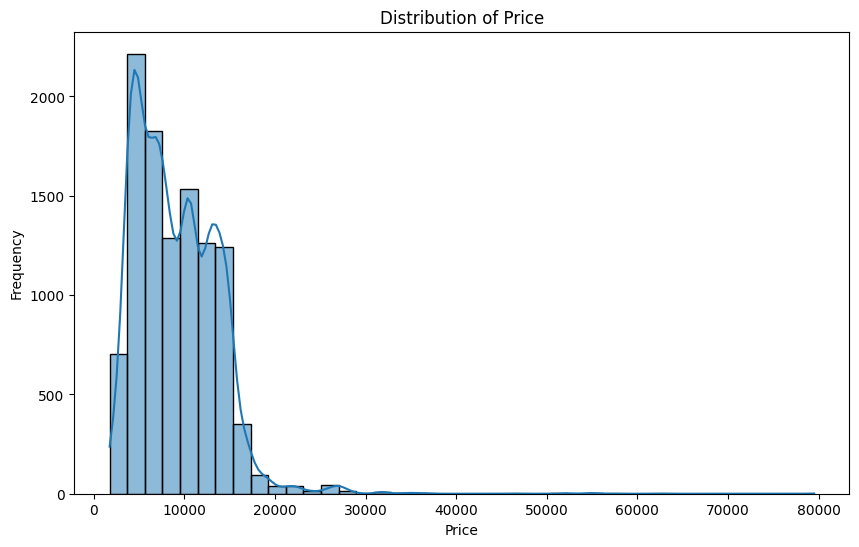

In [16]:
#Data Visualization
# Visualize the distribution according to 'Price' column
plt.figure(figsize=(10, 6))
sns.histplot(faredata['Price'], bins=40, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


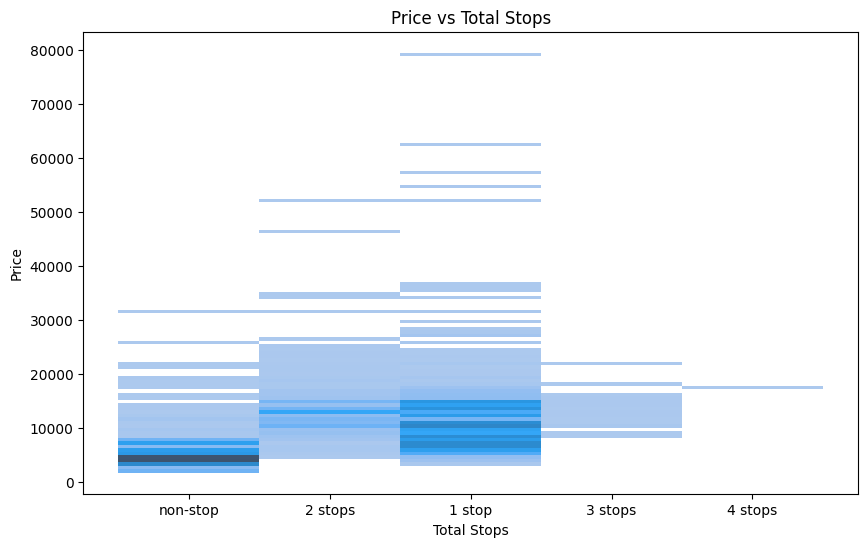

In [17]:
# Visualize the relationship between 'Price' and 'Total_Stops'
plt.figure(figsize=(10, 6))
sns.histplot(x='Total_Stops', y='Price', data=faredata)# here you can use box plot
plt.title('Price vs Total Stops')
plt.xlabel('Total Stops')
plt.ylabel('Price')
plt.show()


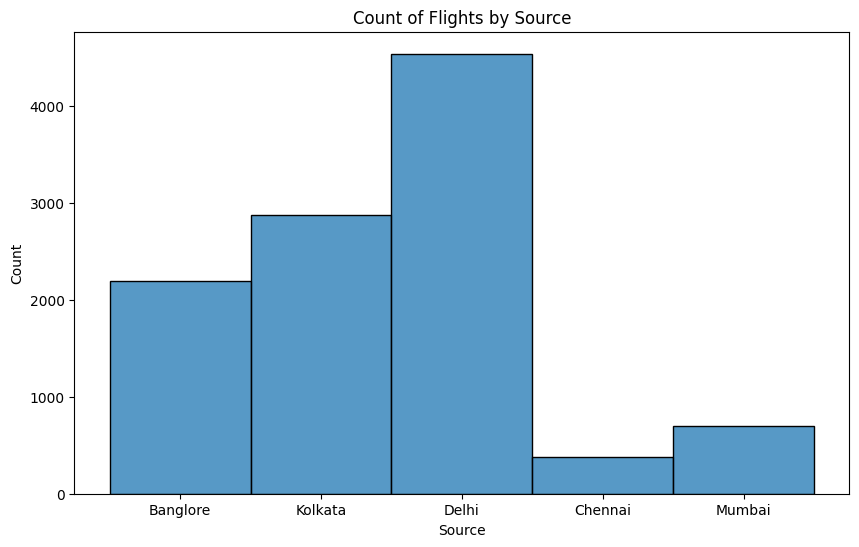

In [18]:
# Visualize the count of flights by 'Source'
plt.figure(figsize=(10, 6))
sns.histplot(x='Source', data=faredata)
plt.title('Count of Flights by Source')
plt.xlabel('Source')
plt.ylabel('Count')
plt.show()

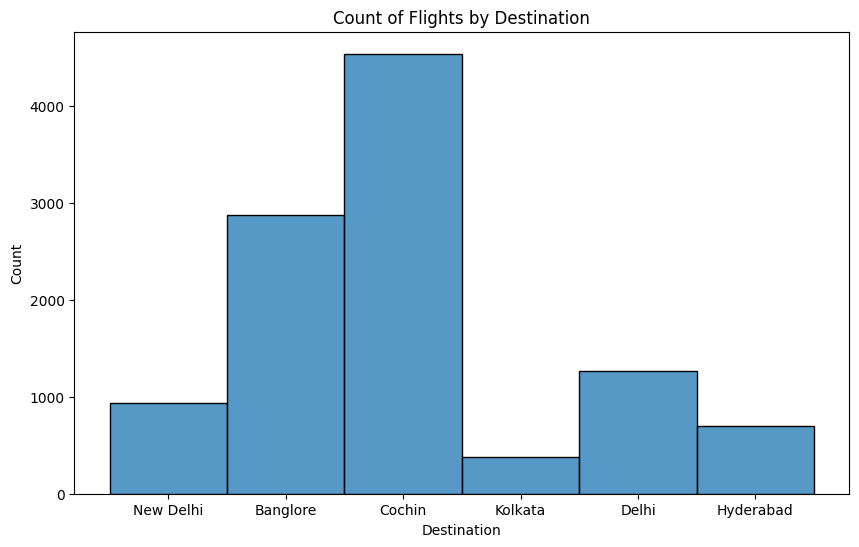

In [19]:
# Visualize the count of flights by 'Destination'
plt.figure(figsize=(10, 6))
sns.histplot(x='Destination', data=faredata)
plt.title('Count of Flights by Destination')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.show()

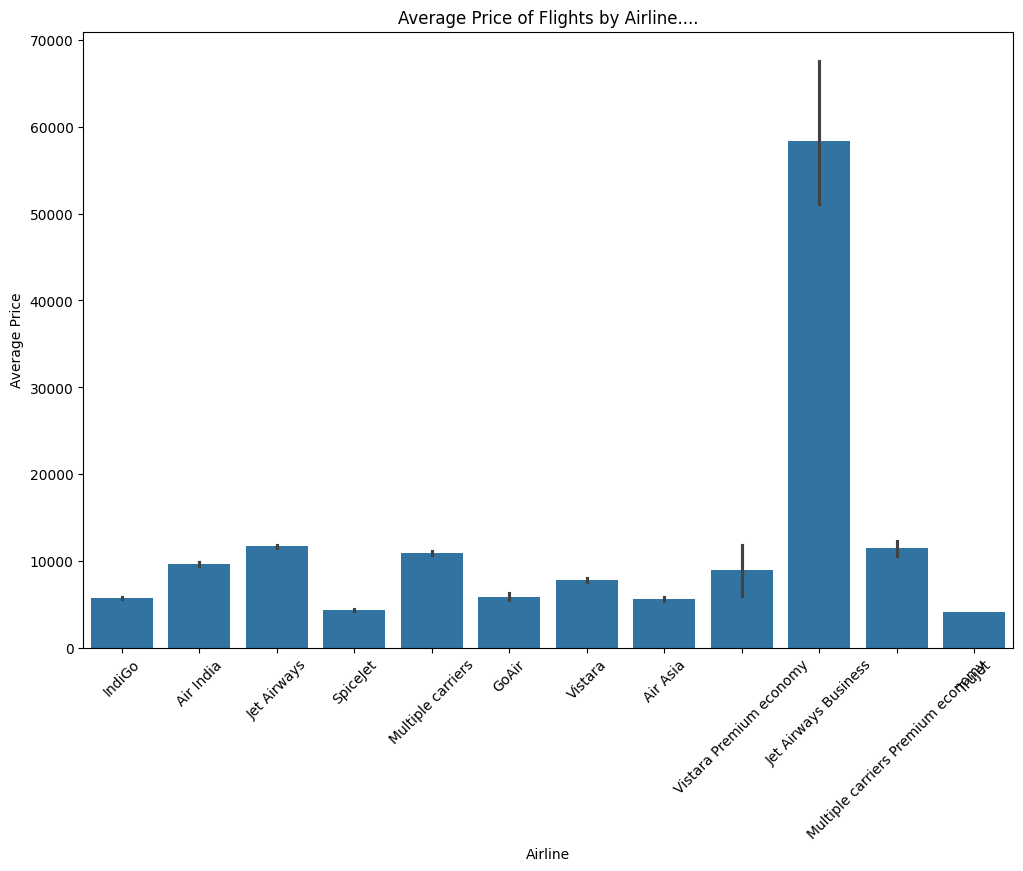

In [20]:
# Visualize the average price of flights by 'Airline'
plt.figure(figsize=(12, 8))
sns.barplot(x='Airline', y='Price', data=faredata)
plt.title('Average Price of Flights by Airline....')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()


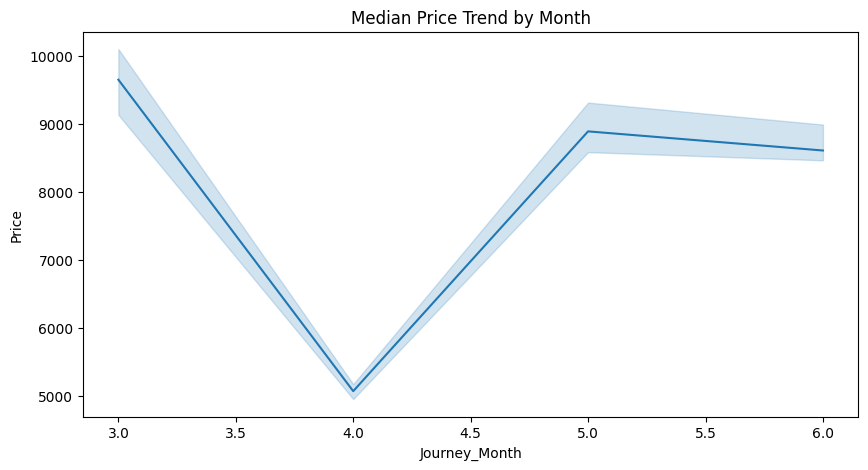

In [21]:
# visualize month_of journey with price
plt.figure(figsize=(10, 5))
sns.lineplot(data=faredata, x='Journey_Month', y='Price', estimator=np.median)
plt.title('Median Price Trend by Month')
plt.show()

In [22]:
faredata.describe(include=['O']).columns 

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info'],
      dtype='object')

In [23]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
faredata["Dep_hour"] = pd.to_datetime(faredata["Dep_Time"]).dt.hour

# Extracting Minutes
faredata["Dep_min"] = pd.to_datetime(faredata["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
faredata.drop(["Dep_Time"], axis = 1, inplace = True)

In [24]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
faredata["Arrival_hour"] = pd.to_datetime(faredata.Arrival_Time).dt.hour

# Extracting Minutes
faredata["Arrival_min"] = pd.to_datetime(faredata.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
faredata.drop(["Arrival_Time"], axis = 1, inplace = True)

In [25]:
faredata["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [26]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = pd.get_dummies(faredata['Airline'], prefix='Airline', drop_first=True)

# Concatenate the one-hot encoded DataFrame with the original DataFrame
faredata = pd.concat([faredata, Airline], axis=1)

# Drop the original 'Destination' column
faredata.drop('Airline', axis=1, inplace=True)

# Display the modified DataFrame
print(faredata.head())

  Date_of_Journey    Source Destination                  Route Duration  \
0      2019-03-24  Banglore   New Delhi              BLR → DEL   2h 50m   
1      2019-05-01   Kolkata    Banglore  CCU → IXR → BBI → BLR   7h 25m   
2      2019-06-09     Delhi      Cochin  DEL → LKO → BOM → COK      19h   
3      2019-05-12   Kolkata    Banglore        CCU → NAG → BLR   5h 25m   
4      2019-03-01  Banglore   New Delhi        BLR → NAG → DEL   4h 45m   

  Total_Stops Additional_Info  Price  Journey_Day  Journey_Month  ...  \
0    non-stop         No info   3897           24              3  ...   
1     2 stops         No info   7662            1              5  ...   
2     2 stops         No info  13882            9              6  ...   
3      1 stop         No info   6218           12              5  ...   
4      1 stop         No info  13302            1              3  ...   

   Airline_GoAir  Airline_IndiGo  Airline_Jet Airways  \
0              0               1                    0

In [27]:
faredata["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [28]:
Source = pd.get_dummies(faredata['Source'], prefix='Source', drop_first=False)

# Concatenate the one-hot encoded DataFrame with the original DataFrame
faredata = pd.concat([faredata, Source], axis=1)

# Drop the original 'Destination' column
faredata.drop('Source', axis=1, inplace=True)

# Display the modified DataFrame
print(faredata.head())

  Date_of_Journey Destination                  Route Duration Total_Stops  \
0      2019-03-24   New Delhi              BLR → DEL   2h 50m    non-stop   
1      2019-05-01    Banglore  CCU → IXR → BBI → BLR   7h 25m     2 stops   
2      2019-06-09      Cochin  DEL → LKO → BOM → COK      19h     2 stops   
3      2019-05-12    Banglore        CCU → NAG → BLR   5h 25m      1 stop   
4      2019-03-01   New Delhi        BLR → NAG → DEL   4h 45m      1 stop   

  Additional_Info  Price  Journey_Day  Journey_Month  Journey_Weekday  ...  \
0         No info   3897           24              3                6  ...   
1         No info   7662            1              5                2  ...   
2         No info  13882            9              6                6  ...   
3         No info   6218           12              5                6  ...   
4         No info  13302            1              3                4  ...   

   Airline_Multiple carriers Premium economy  Airline_SpiceJet  \
0 

In [29]:
faredata["Destination"].value_counts()


Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [30]:
Destination = pd.get_dummies(faredata['Destination'], prefix='Destination', drop_first=False)

# Concatenate the one-hot encoded DataFrame with the original DataFrame
faredata = pd.concat([faredata, Destination], axis=1)

# Drop the original 'Destination' column
faredata.drop('Destination', axis=1, inplace=True)

# Display the modified DataFrame
print(faredata.head())

  Date_of_Journey                  Route Duration Total_Stops Additional_Info  \
0      2019-03-24              BLR → DEL   2h 50m    non-stop         No info   
1      2019-05-01  CCU → IXR → BBI → BLR   7h 25m     2 stops         No info   
2      2019-06-09  DEL → LKO → BOM → COK      19h     2 stops         No info   
3      2019-05-12        CCU → NAG → BLR   5h 25m      1 stop         No info   
4      2019-03-01        BLR → NAG → DEL   4h 45m      1 stop         No info   

   Price  Journey_Day  Journey_Month  Journey_Weekday  Duration_minutes  ...  \
0   3897           24              3                6               170  ...   
1   7662            1              5                2               445  ...   
2  13882            9              6                6              1140  ...   
3   6218           12              5                6               325  ...   
4  13302            1              3                4               285  ...   

   Source_Chennai  Source_Delhi 

In [31]:
faredata["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [32]:
faredata['Total_Stops'].unique()


array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [33]:


faredata.replace({"non-stop": 0, "1 stop":1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [34]:
faredata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 36 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Date_of_Journey                            10682 non-null  datetime64[ns]
 1   Route                                      10682 non-null  object        
 2   Duration                                   10682 non-null  object        
 3   Total_Stops                                10682 non-null  int64         
 4   Additional_Info                            10682 non-null  object        
 5   Price                                      10682 non-null  int64         
 6   Journey_Day                                10682 non-null  int64         
 7   Journey_Month                              10682 non-null  int64         
 8   Journey_Weekday                            10682 non-null  int64         
 9   Duration_minutes 

In [35]:
faredata['Total_Stops'] = pd.to_numeric(faredata['Total_Stops'], errors='coerce')

In [36]:
faredata["Total_Stops"].value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [37]:
faredata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 36 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Date_of_Journey                            10682 non-null  datetime64[ns]
 1   Route                                      10682 non-null  object        
 2   Duration                                   10682 non-null  object        
 3   Total_Stops                                10682 non-null  int64         
 4   Additional_Info                            10682 non-null  object        
 5   Price                                      10682 non-null  int64         
 6   Journey_Day                                10682 non-null  int64         
 7   Journey_Month                              10682 non-null  int64         
 8   Journey_Weekday                            10682 non-null  int64         
 9   Duration_minutes 

In [38]:
# drop route as it is of no use

faredata.drop(["Route"], axis = 1, inplace = True)

In [39]:
# drop Additional_info as it contain no information

faredata.drop(["Additional_Info"], axis = 1, inplace = True)

In [40]:
faredata.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [41]:
faredata.drop(["Duration"], axis = 1, inplace = True)

In [42]:
#faredata.drop(["Dep_Time"], axis = 1, inplace = True)

In [43]:

#faredata.drop(["Arrival_Time"], axis = 1, inplace = True)

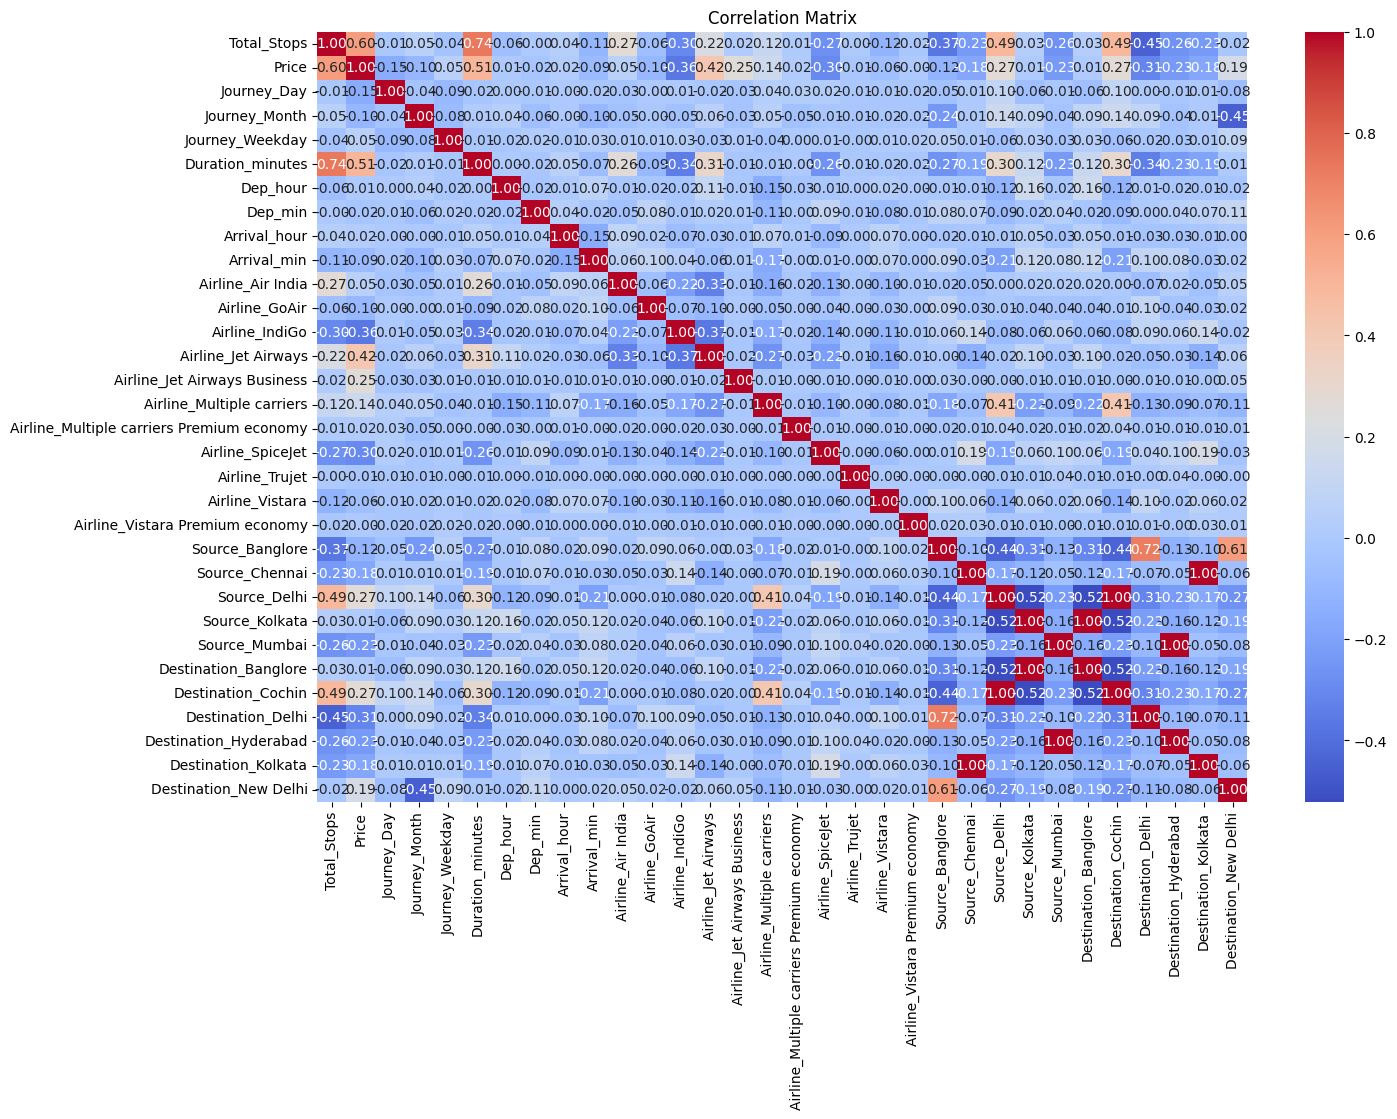

In [44]:
# Correlation matrix to see the relationship between numerical features
correlation = faredata.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [45]:
faredata.to_csv('Processed_FlightFare.csv', index=False)

In [46]:
new_data=pd.read_csv('Processed_FlightFare.csv')
new_data.shape

(10682, 32)

In [47]:
new_data.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Weekday,Duration_minutes,Dep_hour,Dep_min,Arrival_hour,Arrival_min,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,6,170,22,20,1,10,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,2,445,5,50,13,15,...,0,0,1,0,1,0,0,0,0,0
2,2,13882,9,6,6,1140,9,25,4,25,...,0,1,0,0,0,1,0,0,0,0
3,1,6218,12,5,6,325,18,5,23,30,...,0,0,1,0,1,0,0,0,0,0
4,1,13302,1,3,4,285,16,50,21,35,...,0,0,0,0,0,0,0,0,0,1


In [48]:
new_data.tail()

,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Weekday,Duration_minutes,Dep_hour,Dep_min,Arrival_hour,Arrival_min,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
10677,0,4107,9,4,1,150,19,55,22,25,...,0,0,1,0,1,0,0,0,0,0
10678,0,4145,27,4,5,155,20,45,23,20,...,0,0,1,0,1,0,0,0,0,0
10679,0,7229,27,4,5,180,8,20,11,20,...,0,0,0,0,0,0,1,0,0,0
10680,0,12648,1,3,4,160,11,30,14,10,...,0,0,0,0,0,0,0,0,0,1
10681,2,11753,9,5,3,500,10,55,19,15,...,0,1,0,0,0,1,0,0,0,0


In [49]:
new_data.columns

Index(['Total_Stops', 'Price', 'Journey_Day', 'Journey_Month',
       'Journey_Weekday', 'Duration_minutes', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [50]:
X = new_data.loc[:,['Total_Stops', 'Price', 'Journey_Day', 'Journey_Month',
       'Journey_Weekday', 'Duration_minutes', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi']]
X.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Weekday,Duration_minutes,Dep_hour,Dep_min,Arrival_hour,Arrival_min,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,6,170,22,20,1,10,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,2,445,5,50,13,15,...,0,0,1,0,1,0,0,0,0,0
2,2,13882,9,6,6,1140,9,25,4,25,...,0,1,0,0,0,1,0,0,0,0
3,1,6218,12,5,6,325,18,5,23,30,...,0,0,1,0,1,0,0,0,0,0
4,1,13302,1,3,4,285,16,50,21,35,...,0,0,0,0,0,0,0,0,0,1


In [51]:
y = new_data.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 51)

In [53]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [54]:
y_pred = reg_rf.predict(X_test)

In [55]:
reg_rf.score(X_train, y_train)

0.9995894065300436

In [56]:
reg_rf.score(X_test, y_test)

0.9999872551829047

C:\Users\DELL\AppData\Local\Temp\ipykernel_6592\3453123835.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


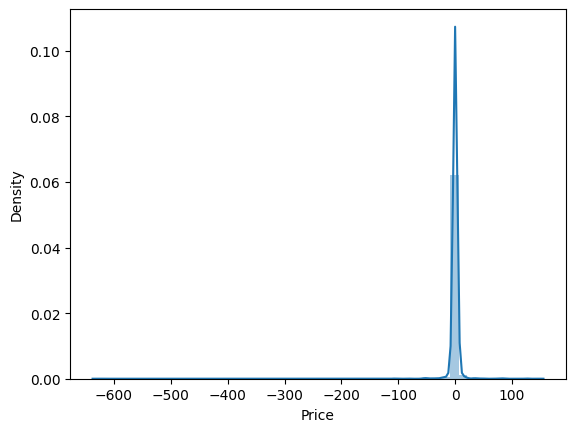

In [57]:
sns.distplot(y_test-y_pred)
plt.show()

In [58]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 1.8964295741693942
MSE: 238.91810851661145
RMSE: 15.456976046970231


In [59]:
metrics.r2_score(y_test ,y_pred)

0.9999872551829047

from sklearn.model_selection import RandomizedSearchCV

n_estimators=[int(x) for x in np.linspace(100,2000,10)]
max_depth=[int(x) for x in np.linspace(100,2000,10)]
min_samples_split=[2,4,6,8,10,12,14]
min_samples_leaf=[1,3,5,7,8,10]
max_features =['sqrt','log2','auto',None]
    
random_search = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'max_feature':['sqrt','log2','auto',None]
}
random_search

rfr_random=RandomizedSearchCV(estimator=rf_reg ,param_distributions=random_search , n_iter=10, cv=5, verbose=2 , random_state=51,n_jobs=1)

rfr_random.fit(X_train , y_train)

In [60]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the hyperparameter search space
n_estimators = [int(x) for x in np.linspace(100, 2000, 10)]
max_depth = [int(x) for x in np.linspace(100, 2000, 10)]
min_samples_split = [2, 4, 6, 8, 10, 12, 14]
min_samples_leaf = [1, 3, 5, 7, 8, 10]
max_features = ['sqrt', 'log2', 'auto', None]

random_search_params = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'max_features': max_features  # Corrected parameter name
}

# Create RandomizedSearchCV object
rfr_random = RandomizedSearchCV(
    estimator=reg_rf,
    param_distributions=random_search_params,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=51,
    n_jobs=1
)

# Perform randomized search
rfr_random.fit(X_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=2000, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=1788; total time=  27.3s
[CV] END max_depth=2000, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=1788; total time=  26.6s
[CV] END max_depth=2000, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=1788; total time=  30.7s
[CV] END max_depth=311, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1155; total time=  30.0s
[CV] END max_depth=311, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1155; total time=  29.8s
[CV] END max_depth=311, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1155; total time=  30.1s
[CV] END max_depth=311, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   1.7s
[CV] END max_depth=311, max_features=sqrt, min_samples_leaf=3, min_samples_split=4,

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [100, 311, 522, 733, 944,
                                                      1155, 1366, 1577, 1788,
                                                      2000],
                                        'max_features': ['sqrt', 'log2', 'auto',
                                                         None],
                                        'min_samples_leaf': [1, 3, 5, 7, 8, 10],
                                        'min_samples_split': [2, 4, 6, 8, 10,
                                                              12, 14],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=51, verbose=2)

In [61]:
rfr_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_features': None,
 'max_depth': 522}

In [62]:
prediction=rfr_random.predict(X_test)

In [63]:
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 1.8964295741693942
MSE: 238.91810851661145
RMSE: 15.456976046970231


In [64]:
metrics.r2_score(y_test ,y_pred)

0.9999872551829047

In [65]:
# Assuming "Total_Stops" is a categorical feature
# Perform one-hot encoding
#new_data = pd.get_dummies(new_data, columns=['Total_Stops'])

# Now "Total_Stops" will be converted into multiple binary columns


In [66]:
import pickle
# open a file, where you ant to store the data
file = open('Flight_fare_pred.pkl', 'wb')
# dump information to that file
pickle.dump(reg_rf, file)

In [67]:
from sklearn import metrics
model = open('Flight_fare_pred.pkl','rb')
forest = pickle.load(model)

In [68]:
y_prediction = forest.predict(X_test)

In [69]:
metrics.r2_score(y_test, y_prediction)

0.9999872551829047

In [70]:
from sklearn.metrics import mean_squared_error, r2_score
# Function to evaluate model performance
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    return rmse, r2

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [72]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
print("Model: Random Forest")
rmse, r2 = evaluate_model(rf_reg, X_train, y_train, X_test, y_test)
print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.2f}")
print(f"Accuracy: {r2*100:.2f}%")
print("-----------DONE------------")

Model: Random Forest
RMSE: 23.75
R^2: 1.00
Accuracy: 100.00%
-----------DONE------------


In [73]:
print('Model Performance on Training Set:', round(rf_reg.score(X_train, y_train)*100,2))
print('Model Performance on Test Set:', round(rf_reg.score(X_test, y_test)*100,2))

Model Performance on Training Set: 99.95
Model Performance on Test Set: 100.0


In [74]:
import pickle
# open a file, where you ant to store the data
file = open('Flight_fare_pred.pkl', 'wb')
# dump information to that file
pickle.dump(rf_reg, file)

In [75]:
from sklearn import metrics
model = open('Flight_fare_pred.pkl','rb')
forest = pickle.load(model)

In [76]:
y_prediction = forest.predict(X_test)

In [77]:
metrics.r2_score(y_test, y_prediction)

0.9999738439655763